## Домашнее задание 1.10.
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

### Шаг 01. Подготовительная работа.

За основу берем датасет по самоубийствам  
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [2]:
#Импорт библиотек
from pylab import rcParams
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [18]:
# Для удобства рассчитаем абсолютный показатель кол-ва суицидов в целом по стране:
def suicides(a):
     return  a['suicides/100k pop'] * a['population'] / 100000
df['suicides_all'] = df.apply(suicides, axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_all
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,20.99559
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,15.98520
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,13.99251
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1.00062
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,8.99704


In [19]:
# Сформулируем датафрейм по штатам
df_usa = df[df['country'] == 'United States']
df_usa.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_all
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,2177.0848
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation,5301.4450
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers,5133.1756
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent,6054.3153
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X,4267.8756


#### График 01. Кол-во суицидов по США за период 1985 по 2015  
В графике участвуют переменные **year** и **suicides_all**  
Цель: показать изменение кол-ва суицидов в динамике

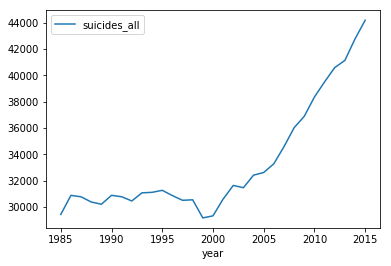

In [20]:
# Построим график изменения по годам. Строим сводную таблицу, рассчитываем суммарные по годам. потом график
df_usa.pivot_table(index = 'year', values = 'suicides_all', aggfunc = 'sum', fill_value = 0).plot()

#### График 02. Распределение кол-ва суицидов в  США в зависимости от возрастной группы  
В графике участвуют переменные **age** и **suicides_all**  
Цель: Характеристики распределения в зависимости от возрастной группы

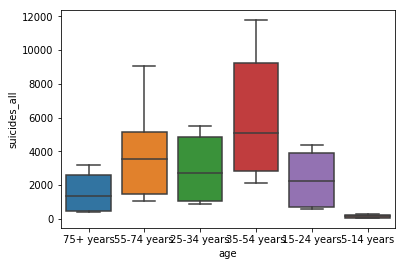

In [8]:
# Теперь боксплот по возрасту:
sns.boxplot(x="age", y="suicides_all",data=df_usa)

#### График 03. Зависимость кол-ва суицидов на 100 тыс. жителей от уровня дохода по всем странам.   
В графике участвуют переменные **gdp_per_capita ($)** и **suicides/100k pop**  
Цель: Посмотрим зависимость суицидов от уровня дохода. 

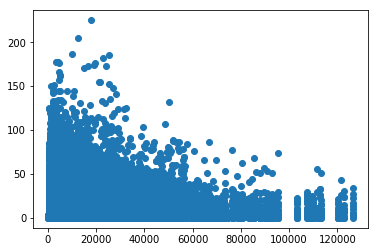

In [21]:
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'])

#### График 04. Зависимость параметров дохода, численности населения и уровня суицидов.
В графике участвуют переменные **population**, **gdp_per_capita ($)** и **suicides/100k pop**  
Цель: Определить возможную зависимость и структуру соотношения параметров

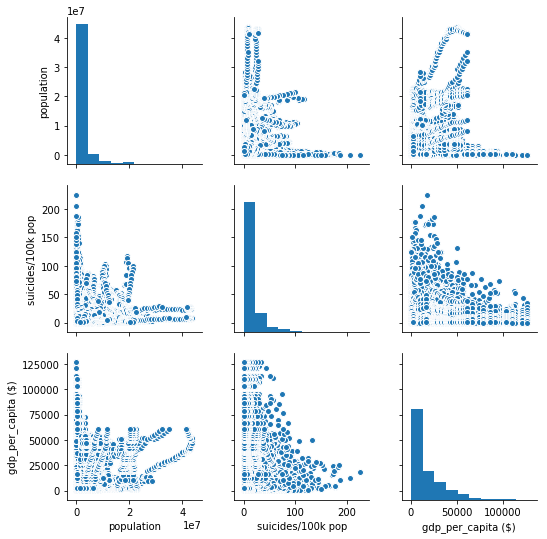

In [22]:
sns_plot = sns.pairplot(
    df[['population', 'suicides/100k pop','gdp_per_capita ($)']])
sns_plot

##### График 05. Тепловая карта 
В графике участвуют переменные **age**, **suicides_all** и **year**  
Цель: Определить в каких возрастных группах и в каком периоде выше суицыды

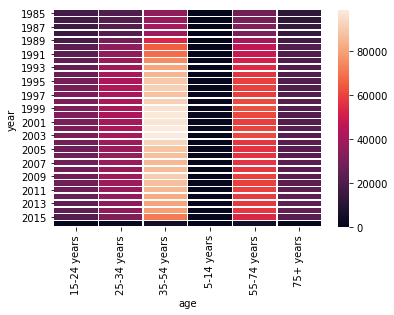

In [42]:
df.head(5)
df_heat = df.pivot_table(
                        index='year', 
                        columns='age', 
                        values='suicides_all', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(df_heat, linewidths=0.5)

##### График 06. Кол-во суицидов по полу 
В графике участвуют переменные **sex**, **suicides_all**  
Цель: Определить распределение суицидов по полу

<Container object of 27820 artists>

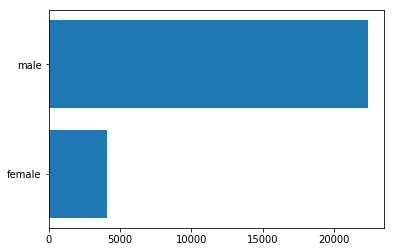

In [45]:
# Столбчатая диаграмма 
plt.barh(df['sex'], df['suicides_all'])